<a href="https://colab.research.google.com/github/KarthikChary1/Convolutional-neural-network-CNN-/blob/main/Covid_Analysis_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from tensorflow import keras 
import numpy as np
import os

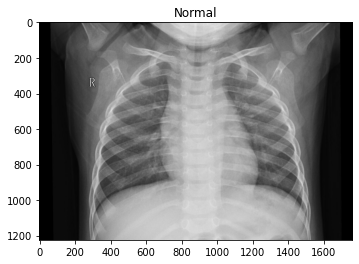

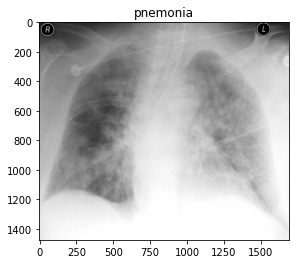

In [24]:
normal=image.load_img("/content/drive/MyDrive/datasets /cnn data/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg")
plt.imshow(normal)
plt.title("Normal")
plt.show()
Pneumonia=image.load_img("/content/drive/MyDrive/datasets /cnn data/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg")
plt.imshow(Pneumonia)
plt.title("pnemonia")
plt.show()


In [2]:
#calling image data generator
validation_data=ImageDataGenerator(rescale=1/255)
train_data=ImageDataGenerator(rescale=1/255)

creating datasets for training and validation

In [3]:
validation_dataset=validation_data.flow_from_directory("/content/drive/MyDrive/datasets /cnn data/xray_dataset_covid19/test",(200,200),class_mode="binary")

Found 40 images belonging to 2 classes.


In [4]:
train_dataset=train_data.flow_from_directory("/content/drive/MyDrive/datasets /cnn data/xray_dataset_covid19/train",(200,200),class_mode="binary")

Found 148 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [6]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

CNN model implementation


In [7]:
model=Sequential([
                  Conv2D(32,(3,3),activation="relu",input_shape=(200,200,3)),
                  MaxPooling2D(),
                  Conv2D(64,(3,3),activation="relu"),
                  MaxPooling2D(),
                  Conv2D(64,(3,3),activation="relu"),
                  MaxPooling2D(),
                  keras.layers.Flatten(),
                  keras.layers.Dense(512,activation="relu"),
                  
                  keras.layers.Dense(1,activation="sigmoid")


])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [9]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["acc"])


In [10]:
model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
5/5 [==============================] - 53s 10s/step - loss: 3.7912 - acc: 0.4459 - val_loss: 0.6457 - val_acc: 0.9000
Epoch 2/10
5/5 [==============================] - 16s 3s/step - loss: 0.6908 - acc: 0.5473 - val_loss: 0.5607 - val_acc: 0.5500
Epoch 3/10
5/5 [==============================] - 16s 3s/step - loss: 1.9907 - acc: 0.5068 - val_loss: 0.5561 - val_acc: 0.6500
Epoch 4/10
5/5 [==============================] - 16s 3s/step - loss: 0.7050 - acc: 0.7568 - val_loss: 7.8628 - val_acc: 0.5000
Epoch 5/10
5/5 [==============================] - 16s 3s/step - loss: 2.5316 - acc: 0.7838 - val_loss: 0.5005 - val_acc: 0.6750
Epoch 6/10
5/5 [==============================] - 16s 3s/step - loss: 0.3380 - acc: 0.8311 - val_loss: 0.0972 - val_acc: 1.0000
Epoch 7/10
5/5 [==============================] - 16s 3s/step - loss: 0.1977 - acc: 0.9054 - val_loss: 1.0855 - val_acc: 0.5000
Epoch 8/10
5/5 [==============================] - 16s 3s/step - loss: 0.2826 - acc: 0.8986 - val_loss: 

Model Evaluation


In [16]:
def predict(URL):
  img=image.load_img(URL,target_size=(200,200))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  prediction=model.predict(img)
  pred=int(prediction)
  # if pred==0:
  #   return "Normal"
  # elif pred==1:
  #   return "Pneumonia"
  return pred


In [12]:
predict("/content/drive/MyDrive/datasets /cnn data/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg")

'Normal'

In [13]:
predict("/content/drive/MyDrive/datasets /cnn data/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg")

'Pneumonia'

In [14]:
predict("/content/drive/MyDrive/datasets /cnn data/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg")

'Pneumonia'

In [18]:
array=[]
for i in validation_dataset.filenames:
  img="/content/drive/MyDrive/datasets /cnn data/xray_dataset_covid19/test/"+i
  pred=predict(img)
  array.append(pred)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(validation_dataset.classes,array)

array([[20,  0],
       [ 0, 20]])